# 基于LightGBM的特征重要性评价

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
import lightgbm as lgb

plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams['font.size'] = 12  # 字体大小
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

In [10]:
df = pd.read_excel('探索信息\\用于第二题的表.xlsx').drop('Unnamed: 0', axis=1)
# df.head()

In [11]:
df["性别"] = df["性别"].map({"男": 1, "女": 0})
df["有无手术史"] = df["有无手术史"].map({"有": 1, "无": 0})
df["有无既往史"] = df["有无既往史"].map({"有": 1, "无": 0})

# 这个特征比例差别太大了，聚合一下
df["是否吸烟"] = df["是否吸烟"].map({"从未吸烟者": 0, 
                                "经常吸烟者：每天吸卷烟1支以上，连续或累计6个月": 1,
                                "偶尔吸烟者：每周吸卷烟超过4次，但平均每天不足1支": 1})

df["是否酗酒"] = df["是否酗酒"].map({"有": 1, "无": 0})
df["有无PONV"] = df["有无PONV"].map({"有": 1, "无": 0})
df["有无晕动史"] = df["有无晕动史"].map({"有": 1, "无": 0})

# 选择特征空间
X = df.drop([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], axis=1)

In [12]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, df[3], train_size=0.8, random_state=1)

'''
model = lgb.LGBMRegressor(learning_rate=0.1)
param = {
        "max_depth":[4, 7, 10],
        "num_leaves":[300, 600, 900],
        "n_estimators":[10, 70, 130],
        'min_child_samples': [18, 20, 22],
        'min_child_weight':[0.001, 0.002]
        }

grid_search3 = GridSearchCV(model, n_jobs=-1, param_grid=param, cv=5, scoring="neg_mean_squared_error")
grid_search3.fit(X1_train, y1_train)
grid_search3.best_estimator_, grid_search3.best_score_
'''

'\nmodel = lgb.LGBMRegressor(learning_rate=0.1)\nparam = {\n        "max_depth":[4, 7, 10],\n        "num_leaves":[300, 600, 900],\n        "n_estimators":[10, 70, 130],\n        \'min_child_samples\': [18, 20, 22],\n        \'min_child_weight\':[0.001, 0.002]\n        }\n\ngrid_search3 = GridSearchCV(model, n_jobs=-1, param_grid=param, cv=5, scoring="neg_mean_squared_error")\ngrid_search3.fit(X1_train, y1_train)\ngrid_search3.best_estimator_, grid_search3.best_score_\n'

max_depth=7, min_child_samples=22, n_estimators=10,num_leaves=300

In [13]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X, df[6], train_size=0.8, random_state=1)

model3 = lgb.LGBMRegressor(max_depth=7, min_child_samples=22, n_estimators=10,num_leaves=300)
y3_pred = model3.fit(X3_train, y3_train).predict(X3_test)

# Mean Absolute Error（平均绝对误差）
print(mean_absolute_error(y3_test, y3_pred))

# Mean Squared Error（均方误差）
print(mean_squared_error(y3_test, y3_pred))

names = ['镇静药名称','性别','年龄','身高','体重','有无手术史','有无既往史',  
        '是否吸烟','是否酗酒','有无PONV','有无晕动史']



0.3052999327571114
0.13908883172210407


# 结果

In [14]:
names

['镇静药名称',
 '性别',
 '年龄',
 '身高',
 '体重',
 '有无手术史',
 '有无既往史',
 '是否吸烟',
 '是否酗酒',
 '有无PONV',
 '有无晕动史']

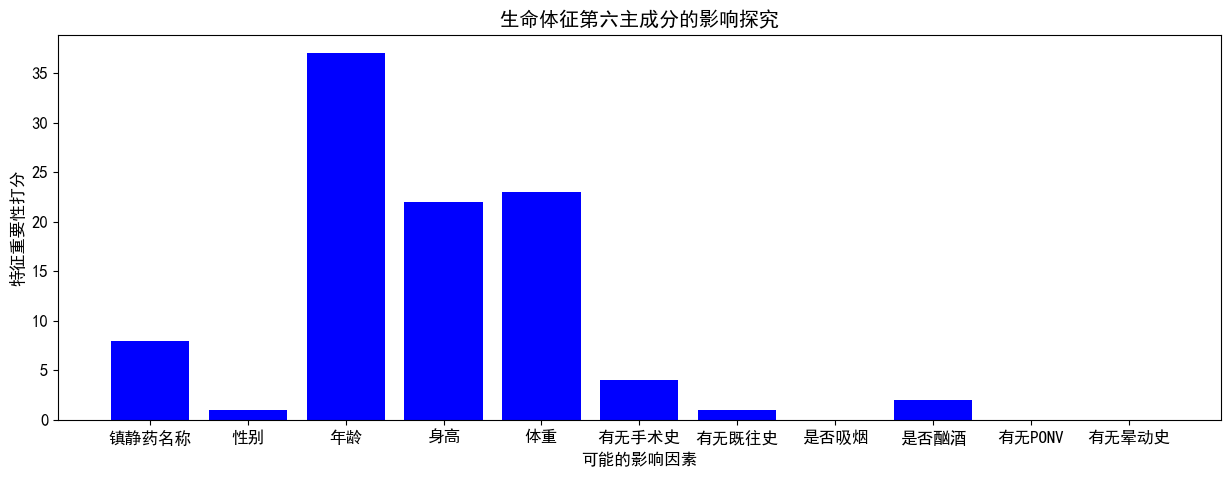

In [16]:
plt.figure(figsize=(15, 5))

plt.title("生命体征第六主成分的影响探究")
plt.xlabel("可能的影响因素")
plt.ylabel("特征重要性打分")
plt.bar(names, model3.feature_importances_, color='b')

plt.show()